<a href="https://colab.research.google.com/github/ddiaz1999/Taller2_IA/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>PREDICTION OF CRIME USING SVM AND ANN</strong>

*   **<font color='red'> Problema </font>** 
##### Analizar el data set proporcionado sobre crímenes en la ciudad de Boston y predecir el crimen por mes, día y por lugar.

---
---

#####Desarrollado por: 
<h6 align=center> ${\text{Jhon Hader Fernández}}$ <h6>
<h6 align=center> ${\text{Diego Fernando Díaz}}$ <h6>
<h6 align=center> ${\text{Oscar Geovanny Baracaldo}}$ <h6>

#####<h6 align=center>{<i>jhon_fernandez, di-diego, obaracaldo</i>}@javeriana.edu.co<h6>
#####<h6 align=center>Pontificia Universidad Javeriana<h6>

<br>


## ***1. ENTORNO DE TRABAJO***

Para el desarrollo del código se requiere de algunos paquetes, módulos y librerías externas.

### ***1.2.  IMPORTAR PAQUETES Y LIBRERÍAS*** 

In [146]:
## Iniciamos por importar las librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prettytable
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

## ***2. ANÁLISIS DE DATOS***

Inicialmente se debe hacer un análisis exploratorio de los datos, que darán información sobre el tipo de datos, la cantidad, los formatos de archivos, etc.



### ***2.1.  OBTENER DATASET

In [147]:
#se guarda en path_crime la ruta del archivo .csv donde se encuentran los datos
path_crime = '/content/drive/My Drive/TALLER 2 IA/dataset/crime.csv'

data = pd.read_csv(path_crime,encoding = 'latin')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
print(data.columns)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [150]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import folium 
from folium.plugins import HeatMap
from fbprophet import Prophet


data = data.rename(columns={'OFFENSE_CODE':'Code','OFFENSE_CODE_GROUP':'Group','OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})
data.head()

,INCIDENT_NUMBER,Code,Group,Description,DISTRICT,REPORTING_AREA,SHOOTING,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [151]:
data.drop(['INCIDENT_NUMBER','Description','Code','SHOOTING','UCR_PART','Lat','Long','Location'],inplace=True,axis=1)
data = data.dropna()
data.head()

,Group,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST


In [152]:
data['Date']=pd.to_datetime(data['Date'])
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307484 entries, 0 to 319072
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Group           307484 non-null  object        
 1   DISTRICT        307484 non-null  object        
 2   REPORTING_AREA  307484 non-null  object        
 3   Date            307484 non-null  datetime64[ns]
 4   YEAR            307484 non-null  int64         
 5   MONTH           307484 non-null  int64         
 6   DAY_OF_WEEK     307484 non-null  object        
 7   HOUR            307484 non-null  int64         
 8   STREET          307484 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 23.5+ MB


Motor Vehicle Accident Response    33684
Larceny                            25578
Medical Assistance                 23001
Investigate Person                 18377
Other                              17515
Drug Violation                     15420
Simple Assault                     15363
Vandalism                          15118
Verbal Disputes                    13023
Towed                              10966
Investigate Property               10847
Larceny From Motor Vehicle         10528
Property Lost                       9531
Warrant Arrests                     7927
Aggravated Assault                  7480
Name: Group, dtype: int64


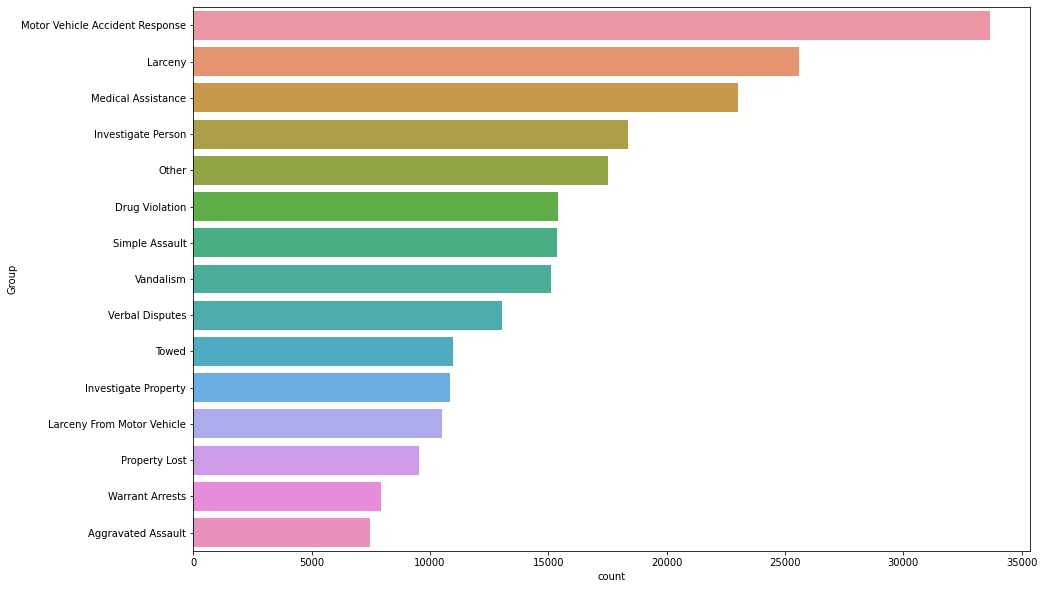

In [153]:
data.index=pd.DatetimeIndex(data.Date)
data.head()
order_data1=data['Group'].value_counts().iloc[:15]
crimes = data['Group'].value_counts().iloc[:15]
crimes = list(crimes.keys())
print(order_data1)
order_data=data['Group'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Group',data=data,order=order_data)
plt.ioff()

En el siguiente bloque se realiza la codificacion a los datos categóricos del dataset.

In [154]:
def integer_encoder(data_frame,column):
    map_to_encode = {}
    serie = data_frame[column].value_counts(normalize=True, sort=True).reset_index()
    serie.sort_values(by=[column], ascending=True, inplace=True)
    serie.reset_index(drop=True, inplace=True)

    for index, row in serie.iterrows():
        map_to_encode[row['index']] = index

    data_frame[column] = data_frame[column].map(map_to_encode).astype(int)        
    return data_frame[column]


mapeo=data['Group'].value_counts()
crime_labels = list(mapeo.keys())
crime_labels.reverse()
print(crime_labels)


data['Group'] = integer_encoder(data,'Group')
data['DISTRICT'] = integer_encoder(data,'DISTRICT')
data['REPORTING_AREA'] = integer_encoder(data,'REPORTING_AREA')
data['REPORTING_AREA'] = integer_encoder(data,'REPORTING_AREA')
data['DAY_OF_WEEK'] = integer_encoder(data,'DAY_OF_WEEK')
data['STREET'] = integer_encoder(data,'STREET')


data.head()

['Burglary - No Property Taken', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'Biological Threat', 'INVESTIGATE PERSON', 'Manslaughter', 'HUMAN TRAFFICKING', 'Gambling', 'Explosives', 'Aircraft', 'Phone Call Complaints', 'Bomb Hoax', 'HOME INVASION', 'Arson', 'Harbor Related Incidents', 'Criminal Harassment', 'Homicide', 'Prostitution', 'Prisoner Related Incidents', 'Service', 'Embezzlement', 'Evading Fare', 'Other Burglary', 'Operating Under the Influence', 'Offenses Against Child / Family', 'License Plate Related Incidents', 'Firearm Discovery', 'Property Related Damage', 'Assembly or Gathering Violations', 'Search Warrants', 'Ballistics', 'Landlord/Tenant Disputes', 'Liquor Violation', 'Auto Theft Recovery', 'Commercial Burglary', 'Recovered Stolen Property', 'Counterfeiting', 'Restraining Order Violations', 'Firearm Violations', 'License Violation', 'Fire Related Reports', 'Disorderly Conduct', 'Police Service Incidents', 'Confidence Games', 'Missing Person Reported', 'Property Fou

,Group,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
Date,,,,,,,,,
2018-09-02 13:00:00,65,5,259,2018-09-02 13:00:00,2018,9,0,13,4228
2018-08-21 00:00:00,59,10,757,2018-08-21 00:00:00,2018,8,3,0,3680
2018-09-03 19:27:00,57,9,666,2018-09-03 19:27:00,2018,9,2,19,1526
2018-09-03 21:16:00,56,9,630,2018-09-03 21:16:00,2018,9,2,21,2832
2018-09-03 21:05:00,56,8,622,2018-09-03 21:05:00,2018,9,2,21,3714


En el siguiente bloque se ajusta el dataset y se divide en los datos de entrenamiento y los datos de prueba, al mismo tiempo estos se escalizan

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def Data_scalization(X_train,X_validation,X_test):
  scalization = MinMaxScaler()
  scalization.fit(X_train)

  X_train = scalization.transform(X_train)
  X_validation = scalization.transform(X_val)
  X_test = scalization.transform(X_test)

  return X_train,X_val,X_test

data.drop(['Date'],inplace=True,axis=1)

y = data['Group'].values
X = data.drop(['Group'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_validation, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train,X_validation,X_test = Data_scalization(X_train,X_validation,X_test)

En la siguiente celda se crea el modelo de máquinas de soporte vectorial. Se realiza el entrenamiento y con los resultados obtenidos se muestra el crimen predicho por el modelo junto con el 'accuracy score' del mismo.

Para el modelo SVC se probó con kernel tipo lineal, rbf, sigmoide y polinómico, obteniendo mejores resultados con el polinómico de orden 15, en concreto se obtuvo un accuracy score del 9.6 %

In [123]:
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='poly', degree=15, verbose=1, max_iter=130)

print("Training...")
model.fit(X_train,y_train)
print("Calculating prediction...")
prediction = model.predict(X_test)
crime_results = []
for i in prediction:
  crime_results.append(crime_labels[i])

print('Prediction codification',prediction)
print('crime predicted according to codification',crime_results)
print('output results (y_test)',y_test)
acc_score = accuracy_score(y_test,prediction)   
print ('{0}: {1}'.format('SVM accuracy score: ',acc_score))

Training...
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Calculating prediction...
Prediction codification [65 66 66 ... 64 12 66]
crime predicted according to codification ['Larceny', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Larceny', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Investigate Person', 'Criminal Harassment', 'Investigate Person', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Larceny', 'Larceny', 'Larceny', 'Motor Vehicle Accident Response', 'Arson', 'Medical Assistance', 'Larceny', 'Motor Vehicle Accident Response', 'Larceny', 'Motor Vehicle Accident Response', 'Motor Vehicle Accident Response', 'Investigate Person',

A continuación se implementa el modelo de red neuronal. En primer lugar se definen los parámetros como el numero de épocas, y luego parámetros intrínsecos como la cantidad de neuronas en cada capa, la función de activación usada en cada una, etc. Se prosigue a entrenar el modelo con los datos procesados previamente y se muestra el rendimiento de este modelo en particular.

In [124]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Dense(30, activation='relu', input_dim=7),
  layers.Dense(30, activation = 'relu'),
  layers.Dense(67, activation = 'softmax') 
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 512
n_epochs = 54
n_train = len(X_train)
n_val = len(X_val)

history = model.fit(
  X_train, 
  y_train,
  steps_per_epoch=n_train // batch_size,
  validation_data=(X_val, y_val),
  epochs=n_epochs,
  validation_steps=n_val // batch_size,
  verbose=2,
)

results = model.evaluate(X_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)

Epoch 1/54
420/420 - 1s - loss: 3.4161 - accuracy: 0.1015 - val_loss: 3.3101 - val_accuracy: 0.1140
Epoch 2/54
420/420 - 1s - loss: 3.3028 - accuracy: 0.1124 - val_loss: 3.2981 - val_accuracy: 0.1157
Epoch 3/54
420/420 - 1s - loss: 3.2920 - accuracy: 0.1136 - val_loss: 3.2889 - val_accuracy: 0.1157
Epoch 4/54
420/420 - 1s - loss: 3.2839 - accuracy: 0.1156 - val_loss: 3.2813 - val_accuracy: 0.1170
Epoch 5/54
420/420 - 1s - loss: 3.2772 - accuracy: 0.1166 - val_loss: 3.2739 - val_accuracy: 0.1191
Epoch 6/54
420/420 - 1s - loss: 3.2694 - accuracy: 0.1188 - val_loss: 3.2686 - val_accuracy: 0.1182
Epoch 7/54
420/420 - 1s - loss: 3.2632 - accuracy: 0.1206 - val_loss: 3.2628 - val_accuracy: 0.1210
Epoch 8/54
420/420 - 1s - loss: 3.2585 - accuracy: 0.1220 - val_loss: 3.2580 - val_accuracy: 0.1229
Epoch 9/54
420/420 - 1s - loss: 3.2550 - accuracy: 0.1229 - val_loss: 3.2555 - val_accuracy: 0.1228
Epoch 10/54
420/420 - 1s - loss: 3.2520 - accuracy: 0.1241 - val_loss: 3.2526 - val_accuracy: 0.1225